## Simple Linear Regression with NumPy

In school, students are taught to draw lines like the following.

$y=2x+1$
<br>

They're taught to pick two values for x and calculate the corresponding values for y using the equation. Then they draw a set of axes, plot the points, and then draw a line extending through the two dots on their axes.

In [7]:
# numpy efficiently deals with numerical multi-dimensional arrays.
import numpy as np

# matplotlib is a plotting library, and pyplot is its easy-to-use module.
import matplotlib.pyplot as plt

# This just sets the default plot size to be bigger.
plt.rcParams['figure.figsize'] = (8, 6)

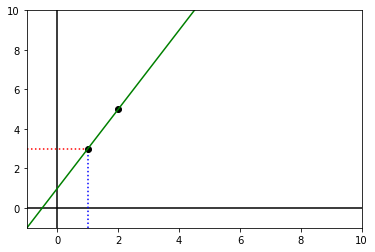

In [2]:
# Draw some axes.
plt.plot([-1, 10], [0, 0], 'k-')
plt.plot([0, 0], [-1, 10], 'k-')

# Plot the red, blue and green lines.
plt.plot([1, 1], [-1, 3], 'b:')
plt.plot([-1, 1], [3, 3], 'r:')

# Plot the two points (1,3) and (2,5).
plt.plot([1, 2], [3, 5], 'ko')
# Join them with an (extending) green lines.
plt.plot([-1, 10], [-1, 21], 'g-')

# Set some reasonable plot limits.
plt.xlim([-1, 10])
plt.ylim([-1, 10])

# Show the plot.
plt.show()

Simple linear regression is about the opposite problem - what if you have some points and are looking for the equation? It's easy when the points are perfectly on a line already, but usually real-world data has some noise. The data might still look roughly linear, but aren't exactly so.

***

## Example (contrived and simulated)

### Scenario
Suppose you are trying to weigh your suitcase to avoid an airline's extra charges. You don't have a weighing scales, but you do have a spring and some gym-style weights of masses 7KG, 14KG and 21KG. You attach the spring to the wall hook, and mark where the bottom of it hangs. You then hang the 7KG weight on the end and mark where the bottom of the spring is. You repeat this with the 14KG weight and the 21KG weight. Finally, you place your case hanging on the spring, and the spring hangs down halfway between the 7KG mark and the 14KG mark. Is your case over the 10KG limit set by the airline?

### Hypothesis
When you look at the marks on the wall, it seems that the 0KG, 7KG, 14KG and 21KG marks are evenly spaced. You wonder if that means your case weighs 10.5KG. That is, you wonder if there is a linear relationship between the distance the spring's hook is from its resting position, and the mass on the end of it.

### Experiment
You decide to experiment. You buy some new weights - a 1KG, a 2KG, a 3Kg, all the way up to 20KG. You place them each in turn on the spring and measure the distance the spring moves from the resting position. You tabulate the data and plot them.

### Analysis
Here we'll import the Python libraries we need for or investigations below.

# numpy efficiently deals with numerical multi-dimensional arrays.
import numpy as np

# matplotlib is a plotting library, and pyplot is its easy-to-use module.
import matplotlib.pyplot as plt

# This just sets the default plot size to be bigger.
plt.rcParams['figure.figsize'] = (8, 6)

Ignore the next couple of lines where I fake up some data. I'll use the fact that I faked the data to explain some results later. Just pretend that w is an array containing the weight values and d are the corresponding distance measurements.

In [8]:
w = np.arange(0.0, 21.0, 1.0)
d = 5.0 * w + 10.0 + np.random.normal(0.0, 5.0, w.size)

In [9]:
# Let's have a look at w.
w

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20.])

In [10]:
# Let's have a look at d.
d

array([  8.76050281,  18.90879056,  27.0242352 ,  17.98663439,
        30.67668722,  35.78254575,  29.70858205,  35.15178578,
        63.03810461,  65.9910772 ,  67.93501797,  59.85575683,
        60.39951802,  78.3068258 ,  82.80314031,  83.14382966,
        89.31775096, 102.47092577, 107.34895731, 106.75064368,
       115.65367681])

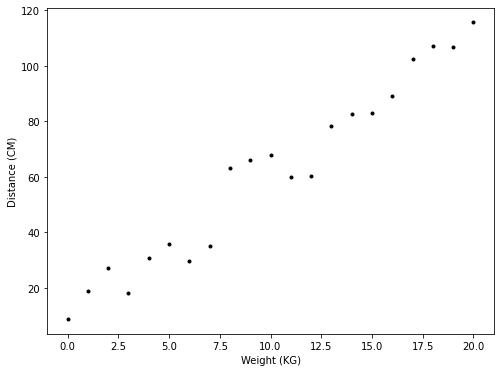

In [11]:
# Create the plot.

plt.plot(w, d, 'k.')

# Set some properties for the plot.
plt.xlabel('Weight (KG)')
plt.ylabel('Distance (CM)')

# Show the plot.
plt.show()

#### Model
It looks like the data might indeed be linear. The points don't exactly fit on a straight line, but they are not far off it. We might put that down to some other factors, such as the air density, or errors, such as in our tape measure. Then we can go ahead and see what would be the best line to fit the data.

#### Straight lines
All straight lines can be expressed in the form y=mx+c. The number m is the slope of the line. The slope is how much y increases by when x is increased by 1.0. The number c is the y-intercept of the line. It's the value of y when x is 0.

#### Fitting the model
To fit a straight line to the data, we just must pick values for m and c. These are called the parameters of the model, and we want to pick the best values possible for the parameters. That is, the best parameter values given the data observed. Below we show various lines plotted over the data, with different values for m and c.

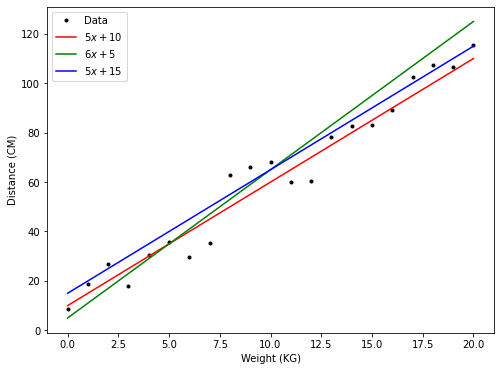

In [12]:
# Plot w versus d with black dots.
plt.plot(w, d, 'k.', label="Data")

# Overlay some lines on the plot.
x = np.arange(0.0, 21.0, 1.0)
plt.plot(x, 5.0 * x + 10.0, 'r-', label=r"$5x + 10$")
plt.plot(x, 6.0 * x +  5.0, 'g-', label=r"$6x +  5$")
plt.plot(x, 5.0 * x + 15.0, 'b-', label=r"$5x + 15$")

# Add a legend.
plt.legend()

# Add axis labels.
plt.xlabel('Weight (KG)')
plt.ylabel('Distance (CM)')

# Show the plot.
plt.show()

#### Calculating the cost
You can see that each of these lines roughly fits the data. Which one is best, and is there another line that is better than all three? Is there a "best" line?

It depends how you define the word best. Luckily, everyone seems to have settled on what the best means. The best line is the one that minimises the following calculated value.

$$\sum_i (y_i - mx_i - c)^2 $$

Here $(x_i, y_i)$ is the $i^{th}$ point in the data set and $\sum_i$ means to sum over all points. The values of $m$ and $c$ are to be determined. 
We usually denote the above as $Cost(m, c)$.

Where does the above calculation come from? It's easy to explain the part in the brackets $(y_i - mx_i - c)$. The corresponding value to xi in the dataset is yi. These are the measured values. The value $m x_i + c$ is what the model says $y_i$ should have been. The difference between the value that was observed ($y_i$) and the value that the model gives ($m x_i + c$), is $y_i - mx_i - c$..

Why square that value? Well note that the value could be positive or negative, and you sum over all of these values. If we allow the values to be positive or negative, then the positive could cancel the negatives. So, the natural thing to do is to take the absolute value  $\mid y_i - m x_i - c \mid$.. Well it turns out that absolute values are a pain to deal with, and instead it was decided to just square the quantity instead, as the square of a number is always positive. There are pros and cons to using the square instead of the absolute value, but the square is used. This is usually called least squares fitting.

In [14]:
# Calculate the cost of the lines above for the data above.
cost = lambda m,c: np.sum([(d[i] - m * w[i] - c)**2 for i in range(w.size)])

print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (5.0, 10.0, cost(5.0, 10.0)))
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (6.0,  5.0, cost(6.0,  5.0)))
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (5.0, 15.0, cost(5.0, 15.0)))

Cost with m =  5.00 and c = 10.00:   959.26
Cost with m =  6.00 and c =  5.00:  1658.95
Cost with m =  5.00 and c = 15.00:  1214.11


#### Minimising the cost
We want to calculate values of $m$ and $c$ that give the lowest value for the cost value above. 
For our given data set we can plot the cost value/function. 
Recall that the cost is:

$$ Cost(m, c) = \sum_i (y_i − mx_i − c)^2 $$

This is a function of two variables, $m$ and $c$, so a plot of it is three dimensional. See the **Advanced** section below for the plot.

In the case of fitting a two-dimensional line to a few data points, we can easily calculate exactly the best values of $m$ and $c$. 
Some of the details are discussed in the **Advanced section**, as they involve calculus, but the resulting code is straight-forward. 
We first calculate the mean (average) values of our $x$ values and that of our $y$ values. Then we subtract the mean of $x$ from each of the $x$ values, and the mean of $y$ from each of the $y$ values. 
Then we take the *dot product* of the new x values and the new $y$ values and divide it by the dot product of the new $x$ values with themselves. That gives us m, and we use m to calculate c.

Remember that in our dataset x is called $w$ (for weight) and $y$ is called $d$ (for distance). We calculate $m$ and $c$ below.

***Calculus is used to find the value of m and c the two values that give the minimum cost value of the cost based on the data***

In [15]:
# Calculate the best values for m and c.

# First calculate the means (a.k.a. averages) of w and d.
w_avg = np.mean(w)
d_avg = np.mean(d)

# Subtract means from w and d.
w_zero = w - w_avg
d_zero = d - d_avg

# The best m is found by the following calculation.
m = np.sum(w_zero * d_zero) / np.sum(w_zero * w_zero)
# Use m from above to calculate the best c.
c = d_avg - m * w_avg

print("m is %8.6f and c is %6.6f." % (m, c))

m is 5.211143 and c is 9.175001.


Note that numpy has a function that will perform this calculation for us, called polyfit. It can be used to fit lines in many dimensions.

In [16]:
np.polyfit(w, d, 1)

array([5.21114272, 9.17500081])

#### Best fit line
So, the best values for m and c given our data and using least squares fitting are about 4.95 for m and about 11.13 for c. We plot this line on top of the data below.

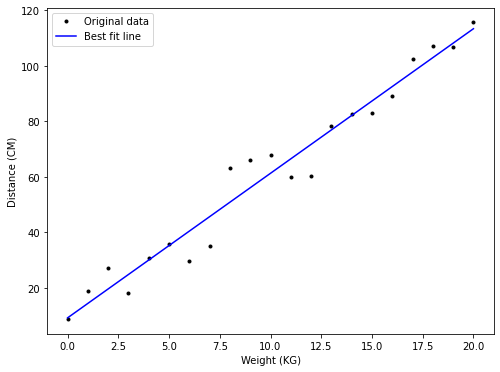

In [17]:
# Plot the best fit line.
plt.plot(w, d, 'k.', label='Original data')
plt.plot(w, m * w + c, 'b-', label='Best fit line')

# Add axis labels and a legend.
plt.xlabel('Weight (KG)')
plt.ylabel('Distance (CM)')
plt.legend()

# Show the plot.
plt.show()

Note that the $Cost$ of the best $m$ and best c is not zero in this case.

In [19]:
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (m, c, cost(m, c)))

Cost with m =  5.21 and c =  9.18:   890.18


#### Summary
In this notebook we did:

1. Investigated the data.
2. Picked a model.
3. Picked a cost function.
4. Estimated the model parameter values that minimised our cost function.

***